In [1]:
import os

os.environ['PYSPARK_PYTHON'] = 'python'

In [2]:
import pyspark

from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
spark

In [5]:
df = spark.read.csv('data/CarSales.csv', header=True)

In [6]:
df.show()

+-----------+------------+--------------+--------+---------+---------+-------------+--------------+----------+---------+--------------+-------------+--------------------+-------------+--------------+-----------------+-----------+--------------------+--------------+------------+--------------------+
|InvoiceDate|        Make|   CountryName|IsDealer|SalePrice|CostPrice|TotalDiscount|DeliveryCharge|SpareParts|LaborCost|    ClientName|        Model|               Color|ReportingYear|ReportingMonth|Registration_Date|VehicleType|       InvoiceNumber|CountryISOCode|OuterPostode|              Region|
+-----------+------------+--------------+--------+---------+---------+-------------+--------------+----------+---------+--------------+-------------+--------------------+-------------+--------------+-----------------+-----------+--------------------+--------------+------------+--------------------+
| 04/10/2012| Rolls Royce|United Kingdom|    NULL|    95000|    50000|          500|           750| 

In [7]:
df.count()

457

In [8]:
df.select('Make').distinct().show()

+------------+
|        Make|
+------------+
|      Jaguar|
|         TVR|
| Rolls Royce|
|         MGB|
|     Triumph|
|     Bentley|
|Aston Martin|
+------------+



In [9]:
df.createOrReplaceTempView('carsales')

In [10]:
uk_jag = spark.sql('SELECT * from carsales where Make=\"Jaguar\" AND CountryName=\"United Kingdom\"')

print(uk_jag.count())
uk_jag.show()

61
+-----------+------+--------------+--------+---------+---------+-------------+--------------+----------+---------+-------------+-----+--------------------+-------------+--------------+-----------------+-----------+--------------------+--------------+------------+--------------------+
|InvoiceDate|  Make|   CountryName|IsDealer|SalePrice|CostPrice|TotalDiscount|DeliveryCharge|SpareParts|LaborCost|   ClientName|Model|               Color|ReportingYear|ReportingMonth|Registration_Date|VehicleType|       InvoiceNumber|CountryISOCode|OuterPostode|              Region|
+-----------+------+--------------+--------+---------+---------+-------------+--------------+----------+---------+-------------+-----+--------------------+-------------+--------------+-----------------+-----------+--------------------+--------------+------------+--------------------+
| 01/05/2012|Jaguar|United Kingdom|    NULL|    44000|    25000|          500|           500|      1950|      486|Bright Orange| XJ12|       C

Text(0.5, 0, 'Total Sales')

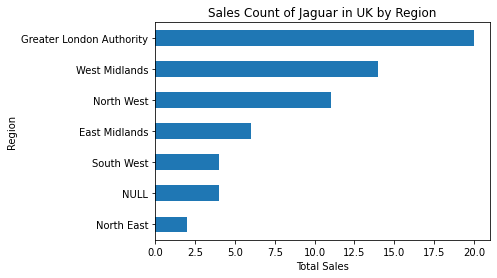

In [11]:
%matplotlib inline
import pandas as pd

# convert to pandas for plotting

pandas_df = uk_jag.toPandas()

ax = pandas_df.groupby('Region')['Color'].count().sort_values().plot(kind='barh',
                                                                     title='Sales Count of Jaguar in UK by Region')

ax.set_xlabel('Total Sales')